In [1]:
from google.colab import drive
drive.mount('/content.gdrive')

Mounted at /content.gdrive


In [2]:
!pip install keras.engine.topology

ERROR: Could not find a version that satisfies the requirement keras.engine.topology (from versions: none)
ERROR: No matching distribution found for keras.engine.topology


In [3]:
from keras.layers import Dense, Dropout, Input

In [4]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input



In [5]:
def VGGupdated(input_tensor=None,classes=2):

    img_rows, img_cols = 300, 300   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)

    img_input = Input(shape=img_dim)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)


    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.


    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model



In [6]:
model = VGGupdated(classes = 2)

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content.gdrive/MyDrive/waste_dataset')

waste_types = os.listdir('/content.gdrive/MyDrive/waste_dataset')
print (waste_types)  #what kinds of waste are in this dataset

print("Types of waste found: ", len(dataset_path))

['Biodegradable', 'Nonbiodegradable']
Types of waste found:  2


In [9]:

wastes = []

for item in waste_types:
 # Get all the file names
 all_waste = os.listdir('/content.gdrive/MyDrive/waste_dataset' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for waste in all_waste:
    wastes.append((item, str('/content.gdrive/MyDrive/waste_dataset' + '/' +item) + '/' + waste))



In [10]:
wastes_df = pd.DataFrame(data=wastes, columns=['waste type', 'image'])
print(wastes_df.head())

      waste type                                              image
0  Biodegradable  /content.gdrive/MyDrive/waste_dataset/Biodegra...
1  Biodegradable  /content.gdrive/MyDrive/waste_dataset/Biodegra...
2  Biodegradable  /content.gdrive/MyDrive/waste_dataset/Biodegra...
3  Biodegradable  /content.gdrive/MyDrive/waste_dataset/Biodegra...
4  Biodegradable  /content.gdrive/MyDrive/waste_dataset/Biodegra...


In [11]:
print("Total number of wastes in the dataset: ", len(wastes_df))

waste_count = wastes_df['waste type'].value_counts()

print("wastes in each category: ")
print(waste_count)


Total number of wastes in the dataset:  600
wastes in each category: 
Biodegradable       300
Nonbiodegradable    300
Name: waste type, dtype: int64


In [12]:
import cv2
path = '/content.gdrive/MyDrive/waste_dataset/'


im_size = 300

images = []
labels = []

for i in waste_types:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [13]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(600, 300, 300, 3)

In [14]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=wastes_df['waste type'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [15]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Your code to load the image paths and labels goes here...

# Define image size
im_size = 300

# Load and preprocess images
images = []
for f in filenames:
    img = cv2.imread(data_path + '/' + f)
    img = cv2.resize(img, (im_size, im_size))
    images.append(img)
images = np.array(images)
images = images.astype('float32') / 255.0

# Load waste labels and encode them
y = wastes_df['waste type'].values
y_labelencoder = LabelEncoder()
y_encoded = y_labelencoder.fit_transform(y)

# One-hot encode the labels
onehotencoder = OneHotEncoder()
Y = onehotencoder.fit_transform(y_encoded.reshape(-1, 1))

print(Y.toarray())  # Convert the sparse matrix to a dense array
print(Y.shape)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
(600, 2)


In [16]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

path = '/content.gdrive/MyDrive/waste_dataset/'
im_size = 300

images = []
labels = []

waste_types = ['Biodegradable', 'Nonbiodegradable']  # Replace with your waste types

for waste_type in waste_types:
    data_path = os.path.join(path, waste_type)
    filenames = [f for f in os.listdir(data_path)]

    for f in filenames:
        img = cv2.imread(os.path.join(data_path, f))
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(waste_type)

images = np.array(images)
images = images.astype('float32') / 255.0

y_labelencoder = LabelEncoder()
y_encoded = y_labelencoder.fit_transform(labels)

onehotencoder = OneHotEncoder()
Y = onehotencoder.fit_transform(y_encoded.reshape(-1, 1)).toarray()

images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(570, 300, 300, 3)
(570, 2)
(30, 300, 300, 3)
(30, 2)


In [17]:
model.fit(train_x, train_y, epochs = 10, batch_size = 32)

Epoch 1/10
18/18 [==============================] - 63s 2s/step - loss: 1.1080 - accuracy: 0.4895
Epoch 2/10
18/18 [==============================] - 13s 729ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 3/10
18/18 [==============================] - 13s 737ms/step - loss: 0.6960 - accuracy: 0.4719
Epoch 4/10
18/18 [==============================] - 13s 737ms/step - loss: 0.6940 - accuracy: 0.5070
Epoch 5/10
18/18 [==============================] - 13s 743ms/step - loss: 0.6930 - accuracy: 0.5070
Epoch 6/10
18/18 [==============================] - 13s 735ms/step - loss: 0.7783 - accuracy: 0.5456
Epoch 7/10
18/18 [==============================] - 13s 728ms/step - loss: 0.6984 - accuracy: 0.4754
Epoch 8/10
18/18 [==============================] - 13s 726ms/step - loss: 0.6953 - accuracy: 0.4825
Epoch 9/10
18/18 [==============================] - 13s 725ms/step - loss: 0.6936 - accuracy: 0.4930
Epoch 10/10
18/18 [==============================] - 13s 728ms/step - loss: 0.6933 - accuracy:

In [18]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
#print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 8s 8s/step - loss: 0.6936 - accuracy: 0.3667
Loss = 0.6935596466064453


Input image shape: (1, 300, 300, 3)


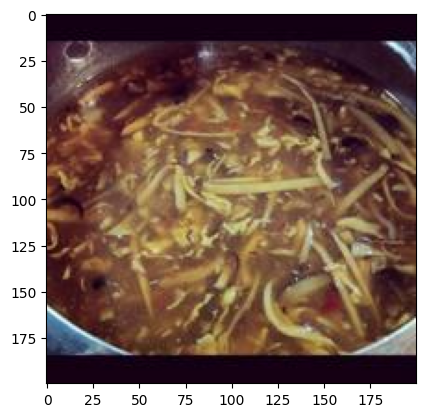

In [28]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
import keras.utils as image
img_path = '/content/TRAIN.1_BIODEG_ORI_0.jpg'

img = image.load_img(img_path, target_size=(300, 300))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [29]:
print(model.predict(x))

1/1 [==============================] - 1s 1s/step
[[0.5007815  0.49921852]]
